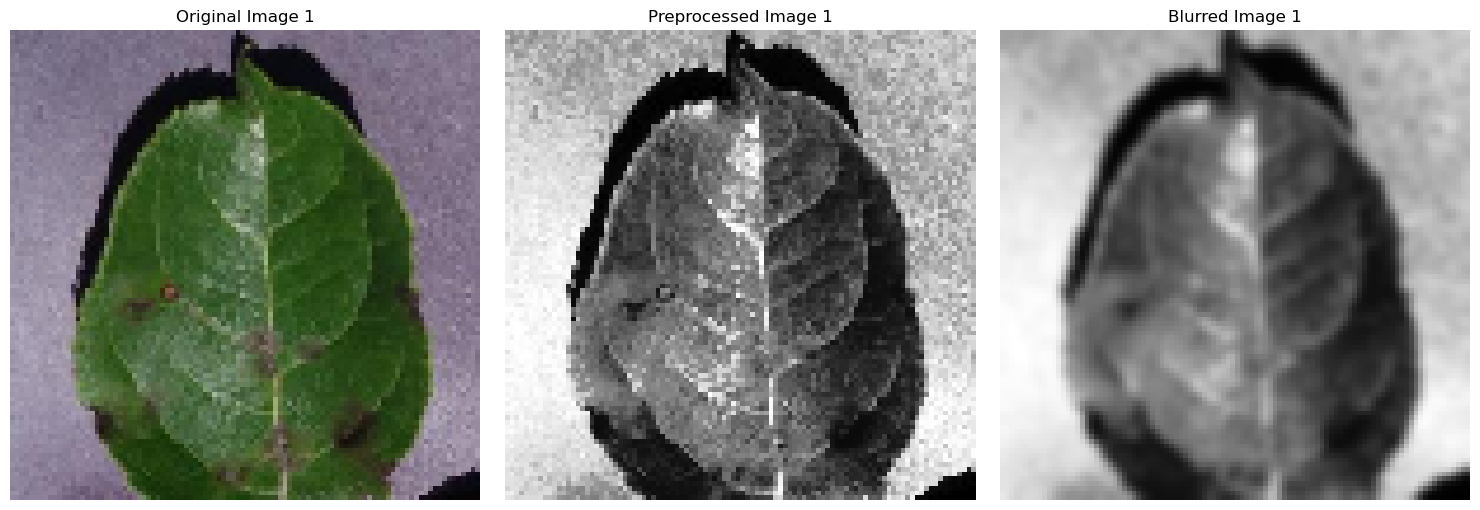

In [8]:
import os
import cv2
from skimage import exposure
import matplotlib.pyplot as plt

# Function to load and preprocess images from a folder
def load_images_from_folder(folder, target_size=(100, 100), num_images=2):
    images = []
    filenames = os.listdir(folder)[:num_images]  # Select only the first two
    for filename in filenames:
        path = os.path.join(folder, filename)
        image = cv2.imread(path)
        if image is not None:
            image = cv2.resize(image, target_size)
            images.append(image)
    return images

# Function to preprocess images
def preprocess_images(images):
    preprocessed_images = []
    for image in images:
        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Enhance contrast
        enhanced_image = exposure.equalize_hist(gray_image)
        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)
        preprocessed_images.append((enhanced_image, blurred_image))
    return preprocessed_images

# Load images from the dataset folder
dataset_folder = "dataset"
images = load_images_from_folder(dataset_folder)

# Preprocess images
preprocessed_images = preprocess_images(images)

# Display original, preprocessed, and blurred images side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image 1")
axes[0].axis('off')

axes[1].imshow(preprocessed_images[0][0], cmap='gray')
axes[1].set_title("Preprocessed Image 1")
axes[1].axis('off')

axes[2].imshow(preprocessed_images[0][1], cmap='gray')
axes[2].set_title("Blurred Image 1")
axes[2].axis('off')

plt.tight_layout()
plt.show()
